In [22]:
# Regresja z wieloma zmiennymi

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/mateuszr/ml-course-1/main/datasets/advertising.csv')

In [25]:
# Alternatywny sposób wczytania danych (po uprzednim wrzuceniu pliku na dysk Google Drive do katalogu "Data")

#!cp /content/drive/MyDrive/Data/advertising.csv /content/
#df = pd.read_csv('advertising.csv')

Text(0.5, 1.0, 'Sales ~ Newspaper')

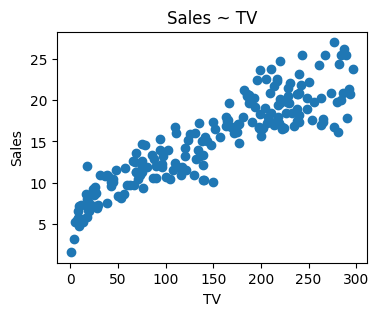

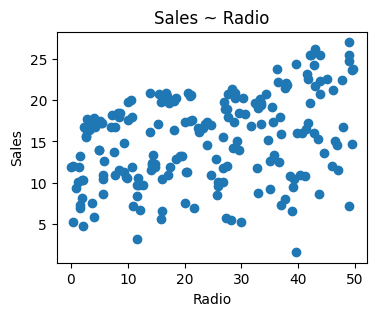

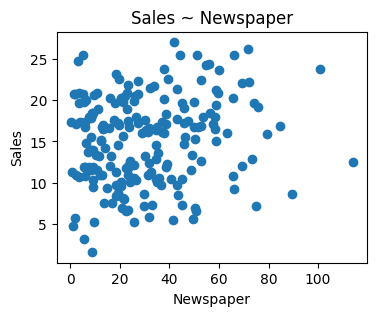

In [26]:
# Wykres punktowy dla wynikow sprzedazy ("Sales") w zależności od nakładu na reklamę w TV, radiu i prasie


plot.subplots(figsize=(4, 3))
plot.scatter(df["TV"], df["Sales"])
plot.xlabel("TV")
plot.ylabel("Sales")
plot.title("Sales ~ TV")

plot.subplots(figsize=(4, 3))
plot.scatter(df["Radio"], df["Sales"])
plot.xlabel("Radio")
plot.ylabel("Sales")
plot.title("Sales ~ Radio")

plot.subplots(figsize=(4, 3))
plot.scatter(df["Newspaper"], df["Sales"])
plot.xlabel("Newspaper")
plot.ylabel("Sales")
plot.title("Sales ~ Newspaper")

In [27]:
# tutaj od razu uzyjemy OLS gdyz zalezy nam na statystykach p-value i F-statistics

import statsmodels.api as sm
from scipy import stats



In [28]:
# Zerknijmy jak wygladaja 3 proste regresje liniowe:
# oddzielnie dla kazdej ze zmiennych niezależnych
# Sales ~ TV
# Sales ~ Radio
# Sales ~ Newspaper


X_train = df["TV"]
y_train = df["Sales"]

X2 = sm.add_constant(X_train)
model = sm.OLS(y_train, X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Mon, 22 May 2023   Prob (F-statistic):           7.93e-74
Time:                        00:52:24   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

In [29]:

X_train = df["Radio"]
y_train = df["Sales"]

X2 = sm.add_constant(X_train)
model = sm.OLS(y_train, X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     27.57
Date:                Mon, 22 May 2023   Prob (F-statistic):           3.88e-07
Time:                        00:52:24   Log-Likelihood:                -603.18
No. Observations:                 200   AIC:                             1210.
Df Residuals:                     198   BIC:                             1217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2357      0.653     18.724      0.0

In [30]:

X_train = df["Newspaper"]
y_train = df["Sales"]

X2 = sm.add_constant(X_train)
model = sm.OLS(y_train, X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.067
Date:                Mon, 22 May 2023   Prob (F-statistic):             0.0255
Time:                        00:52:24   Log-Likelihood:                -613.69
No. Observations:                 200   AIC:                             1231.
Df Residuals:                     198   BIC:                             1238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9595      0.638     21.870      0.0

In [31]:

X_train = df[["TV", "Radio", "Newspaper"]]
y_train = df["Sales"]

X2 = sm.add_constant(X_train)
model = sm.OLS(y_train, X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 22 May 2023   Prob (F-statistic):           8.13e-99
Time:                        00:52:24   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

In [32]:
X_train = df[["TV", "Radio"]]
y_train = df["Sales"]

X2 = sm.add_constant(X_train)
model = sm.OLS(y_train, X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Mon, 22 May 2023   Prob (F-statistic):          2.39e-100
Time:                        00:52:25   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

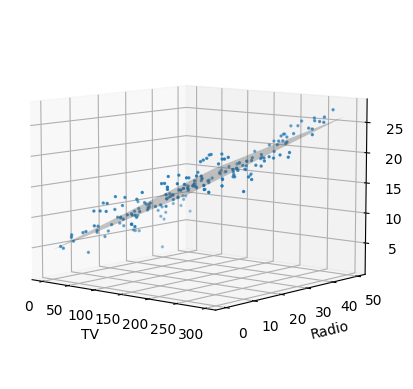

In [33]:
# spojrzmy tylko na obserwacje TV i Radio:

X_train = df[["TV", "Radio"]]
y_train = df["Sales"]

X2 = sm.add_constant(X_train)
model = sm.OLS(y_train, X2)
result = model.fit()

# ten kod mozemy zignoroiwać, to jest tylko aby pokazać jak wyglada
# płaszczyna regresji dla 3 wymiarów: 2 zmiennych niezaleznych (X i Y jako TV i Radio)
# i w osi Z zmienna zależna Sales.

fig = plot.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev = 8, azim = -50)

ax.scatter(df["TV"], df["Radio"], df["Sales"], s=2)
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

x, y = model.exog_names[1:3]

x_range = np.arange(df[x].min(), df[x].max())
y_range = np.arange(df[y].min(), df[y].max())

X, Y = np.meshgrid(x_range, y_range)

exog = pd.DataFrame({x: X.ravel(), y: Y.ravel()})
e2 = sm.add_constant(exog)
Z = result.predict(e2).values.reshape(X.shape)

ax.plot_surface(X, Y, Z, color='gray',alpha=0.4)



In [34]:
import matplotlib.animation
from IPython.display import HTML

def animate(i):
    ax.view_init(elev = 8, azim = i*10)

animation = matplotlib.animation.FuncAnimation(fig, animate, frames=36, interval = 100 ,repeat = True)

HTML(animation.to_html5_video())

# animation.save('anim.gif', writer = "pillow", fps=10 )  

In [35]:
# Przykład, w którym uwzględniamy pewną synegię między zmiennymi Radio i TV
# Tworzymy nową zmienną która będzie iloczynem TV i Radio.
# dzielimy wartość przez 100 aby wszytskie wartości były w podobnym rzędzie wartości.
# (normalizacja wartości zmiennych)

# Tworzymy tu nową kolumnę "TV&Radio" której wartości będą iloczynem wartosci z kolumny "TV" i "Radio":

# df["TV&Radio"] = df["TV"] * df["Radio"]

df["TV&Radio"] = df["TV"] * df["Radio"] / 100


In [36]:
df

,TV,Radio,Newspaper,Sales,TV&Radio
0,230.1,37.8,69.2,22.1,86.9778
1,44.5,39.3,45.1,10.4,17.4885
2,17.2,45.9,69.3,12.0,7.8948
3,151.5,41.3,58.5,16.5,62.5695
4,180.8,10.8,58.4,17.9,19.5264
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,1.4134
196,94.2,4.9,8.1,14.0,4.6158
197,177.0,9.3,6.4,14.8,16.4610
198,283.6,42.0,66.2,25.5,119.1120


In [37]:
# Przykład, w którym uwzględniamy pewną synegię między zmiennymi Radio i TV
# Trenujemy model regresji na wszytskich 3 zmiennych i obserwujemy rezultat

X_train = df[["TV", "Radio", "TV&Radio"]]
y_train = df["Sales"]

X2 = sm.add_constant(X_train)
model = sm.OLS(y_train, X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     694.7
Date:                Mon, 22 May 2023   Prob (F-statistic):          3.90e-104
Time:                        00:52:39   Log-Likelihood:                -370.83
No. Observations:                 200   AIC:                             749.7
Df Residuals:                     196   BIC:                             762.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1926      0.410     15.101      0.0

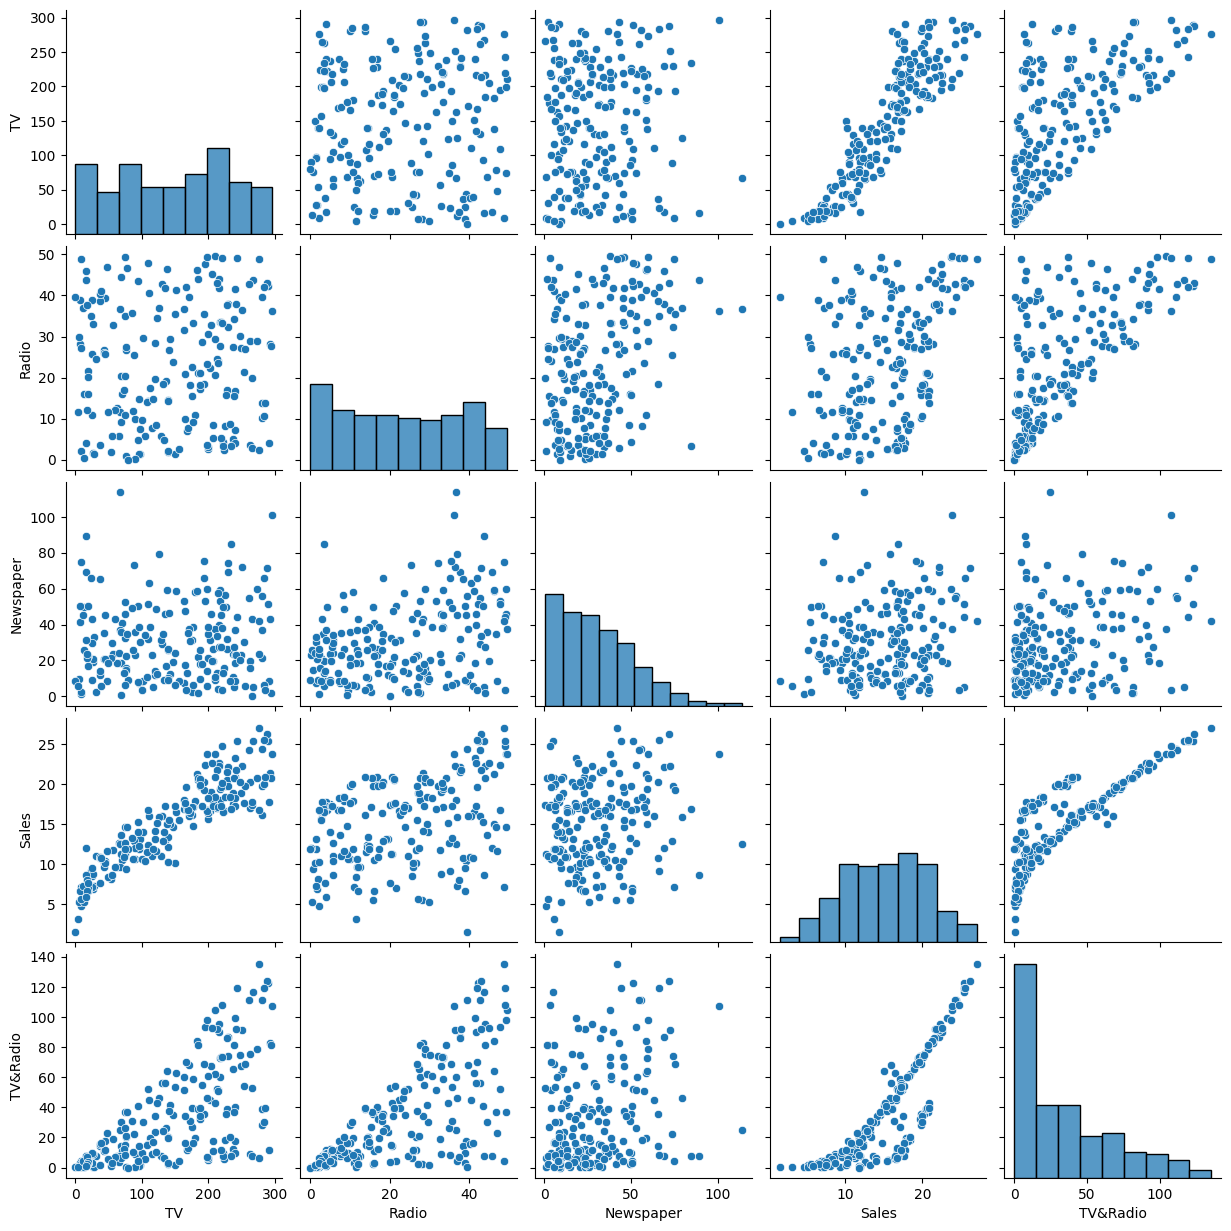

In [38]:
# dla przypomnienia: wizualizacja wszystkich zmiennych w naszej ramce w ukladzie
# "kazdy z kazdym"

import seaborn as sns

sns.pairplot(df)

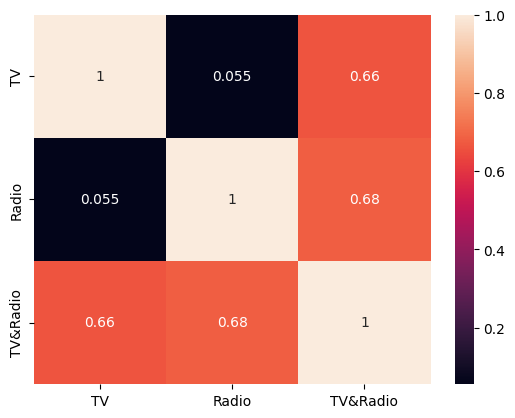

In [39]:
# korelacja między zmiennymi niezależnymi.
# wysoka korelacja między zmiennymi niezaleznymi nie jest pożądana.

sns.heatmap(df[["TV", "Radio", "TV&Radio"]].corr(), annot = True);


In [40]:
# jak przewidywać nowe dane?

# W tym notatniku trenowaliśmy model regresji przy pomocy funckji OLS z pakietu statsmodel
# ze względu na interesujące nas metryki (p-value, F-statistics, R2).
# Model ten też można uzyć do inferencji (czyli przewidywania nowych wartosci),
# ale nie jest to tak wygodne, jak uzycie pakietu sci-kit learn (sklearn.linear_model)
# 
# Wytrenujmy zatem model przy pomocy funckji LinearRegression pakietu sci-kit learn:

from sklearn.linear_model import LinearRegression

X_train = df[["TV", "Radio", "TV&Radio"]]
y_train = df["Sales"]

model = LinearRegression()
model.fit(X_train, y_train)

# dla sprawdzenia wypiszmy metryke R2 - powinna byc taka sama jak w przypadku modelu
# regresji przy pomocy funkcji OLS

r_squared = model.score(X_train, y_train)
print("R2:", r_squared)


R2: 0.9140400446988947


In [41]:
# Inferencja:

# Do inferencji (predykcji) stwórzmy ramkę danych z kilkoma przykładowymi danymi

data = {'TV': [100, 200, 100],
        'Radio': [100, 100, 200]}

# tworzymy nową ramkę danych:
new_data = pd.DataFrame(data)
# podobnie jak poprzednio musimy stworzyć kolumnę "TV&Radio"
# gdyż nasz model także został wtrenowany na 3 zmiennych niezależnych:
# "TV", "Radio", "TV&Radio"
new_data["TV&Radio"] = new_data["TV"] * new_data["Radio"] / 100

new_data

,TV,Radio,TV&Radio
0,100,100,100.0
1,200,100,200.0
2,100,200,200.0


In [42]:
# teraz wykonujemy właściwą inferencję:

y_pred = model.predict(new_data)

# wynik (wartość Y dla każdego wiersza)
y_pred

array([19.20880658, 27.99801035, 27.86718787])